In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import platform
import os
import multiprocessing
import datetime

%matplotlib inline

# Parallel test results.

In [2]:
data = pd.read_csv("par_test_results.txt", sep=' ', header=None, names=["lib", 'test', 'test_name'] + ["%d_%d"%(i,j) for i in range(7) for j in range (4)])

In [3]:
data["testid"] = data["test"] + "_" + data["test_name"]
data = data.reindex_axis(sorted(data.columns), axis=1)
tests = sorted(list(set(data['testid'].tolist())))
libs = sorted(list(set(data['lib'].tolist())))

In [4]:
for loop in range(7):
    data["mean%d"%(loop)] = data[["%d_%d" % (loop, i) for i in range(4)]].mean(axis=1)
    data["std%d"%(loop)] = data[["%d_%d" % (loop, i) for i in range(4)]].std(axis=1)
    
data.drop(["%d_%d"%(i,j) for i in range(7) for j in range (4)], inplace=True, axis=1)

means = ["mean%d"%(i) for i in range(7)]
stds = ["std%d"%(i) for i in range(7)]

In [5]:
# df = pd.DataFrame(columns=["lib", "testid", "time", "mean", "std"])
# for 

In [6]:
print "Version:", platform.platform()
print "CPU cores:", multiprocessing.cpu_count()
print "Page size:", os.sysconf('SC_PAGE_SIZE')
print "Current time:", datetime.datetime.now()

Version: Darwin-14.5.0-x86_64-i386-64bit
CPU cores: 8
Page size: 4096
Current time: 2016-05-14 22:17:56.348830


In [7]:
# data

,lib,test,test_name,testid,mean0,std0,mean1,std1,mean2,std2,mean3,std3,mean4,std4,mean5,std5,mean6,std6
0,dkopyrin,dkopyrin,test_ht,dkopyrin_test_ht,0.025750,0.000871,0.026100,0.001788,0.045816,0.018034,0.059716,0.014010,0.091913,0.003818,0.172209,0.004890,0.333990,0.009234
1,dkopyrin,dkopyrin,test_ladder,dkopyrin_test_ladder,0.408951,0.004072,0.515326,0.184795,0.212801,0.028774,0.211542,0.079943,0.155595,0.014574,0.211631,0.044685,0.220751,0.057518
2,dkopyrin,dkopyrin,test_stairs,dkopyrin_test_stairs,0.411465,0.053488,0.337785,0.216872,0.141634,0.012234,0.138094,0.004824,0.118854,0.004151,0.130977,0.009223,0.162467,0.011633
3,dkopyrin,enikitenko,test1,enikitenko_test1,0.450553,0.026540,0.237979,0.010894,0.172780,0.045444,0.141838,0.005375,0.143590,0.002796,0.155519,0.002589,0.162778,0.007333
4,enikitenko,dkopyrin,test_ht,dkopyrin_test_ht,0.013824,0.000985,0.013467,0.001289,0.021106,0.001902,0.029673,0.003478,0.050792,0.002064,0.096946,0.001033,0.195143,0.003650
5,enikitenko,dkopyrin,test_ladder,dkopyrin_test_ladder,0.257806,0.009385,0.158766,0.003314,0.122389,0.011339,0.098806,0.003991,0.093928,0.005200,0.088754,0.003690,0.094822,0.003619
6,enikitenko,dkopyrin,test_stairs,dkopyrin_test_stairs,0.220700,0.007844,0.142313,0.005801,0.110684,0.013827,0.090382,0.004728,0.087851,0.004104,0.089023,0.005734,0.083523,0.008504
7,enikitenko,enikitenko,test1,enikitenko_test1,0.284213,0.007166,0.151260,0.006943,0.133611,0.014769,0.087706,0.004406,0.091876,0.002874,0.090783,0.003867,0.091228,0.002680
8,sabramov,dkopyrin,test_ht,dkopyrin_test_ht,0.085028,0.004317,1.279025,0.054656,2.502731,0.088321,7.448344,0.059730,15.038019,1.130379,31.626419,0.156555,55.161540,10.957789
9,sabramov,dkopyrin,test_ladder,dkopyrin_test_ladder,1.715268,0.093929,13.498208,0.185359,13.467219,0.635422,20.026075,0.224858,20.489580,0.466208,21.129666,0.052057,21.062582,0.074602


In [8]:
p_timeout = 0
p_fail = -5

p_passed = 5

p_all_passed = 5
p_all_passed_with_timeout = 3

In [9]:
ranks = pd.DataFrame(index=libs, columns=tests).fillna(p_fail)

datarank = data[['lib', 'testid']]
for test in tests:
    testf = datarank[datarank.testid == test]

    for index, row in testf.iterrows():
        if len(row[row == -1]) == 0:     
            ranks.set_value(row['lib'], row['testid'], p_passed)
        else:
            ranks.set_value(row['lib'], row['testid'], p_timeout)
            
# ranks['All test passed'] = np.zeros(len(libs))
# all_passed = ranks[ranks <= p_timeout].any(axis=1)
# 
# for i, item in all_passed.iteritems():
#     if item == False: 
#         ranks.set_value(i, 'All test passed', p_all_passed) 

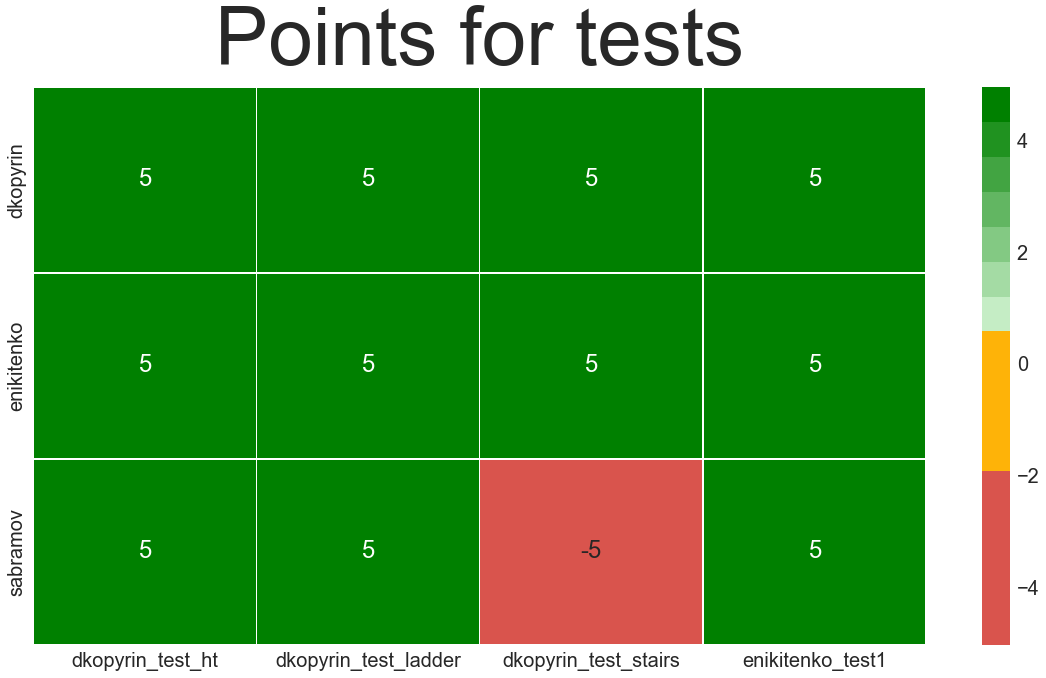

In [10]:
colors = ["pale red", "pale red", "pale red", "pale red", "pale red", "amber", "amber", "amber", "amber"]
cmap = matplotlib.colors.ListedColormap(sns.xkcd_palette(colors) + sns.light_palette("green", n_colors=8)[1:])

sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.plt.title("Points for tests", fontsize=80, y=1.03)
sns.heatmap(ranks, annot=True, cmap=cmap, center=0, linewidths=.5)
plt.show()

In [11]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter by dokhlopkov.
</footer>''')